In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving spam.csv to spam (1).csv


In [ ]:
import pandas as pd
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']
file_path = 'spam.csv'
for encoding in encodings:
  try:
    df = pd.read_csv(file_path, encoding=encoding)
    print(f"file successfully read with encoding: {encoding}")
    break
  except UnicodeDecodeError:
      print(f"failed to read with encoding: {encoding}")
      continue
if 'df' in locals():
   print("csv file has been successfully loaded.")
else:
   print("All encoding attempts failed. unable to read the CSV file.")

failed to read with encoding: utf-8
file successfully read with encoding: latin1
csv file has been successfully loaded.


In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2545,ham,So are you guys asking that i get that slipper...,NaN,NaN,NaN
2640,ham,Pandy joined 4w technologies today.he got job..,NaN,NaN,NaN
1750,ham,Got it..mail panren paru..,NaN,NaN,NaN
5267,ham,Anything lar then Ì_ not going home 4 dinner?,NaN,NaN,NaN
651,ham,I'm gonna say no. Sorry. I would but as normal...,NaN,NaN,NaN


In [ ]:
df.shape

(5169, 2)

Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int64 
 1   text    5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [ ]:
df.rename(columns={'v1' : 'target','v2': 'text'},inplace=True)
df.sample(5)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
3153,spam,Not heard from U4 a while. Call 4 rude chat pr...,NaN,NaN,NaN
2007,ham,Hi here. have birth at on the to at 8lb 7oz....,NaN,NaN,NaN
480,ham,"Almost there, see u in a sec",NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
2706,ham,S now only i took tablets . Reaction morning o...,NaN,NaN,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.isnull().sum()

target           0
text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 5)

Data exploration

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5169, 2)

In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

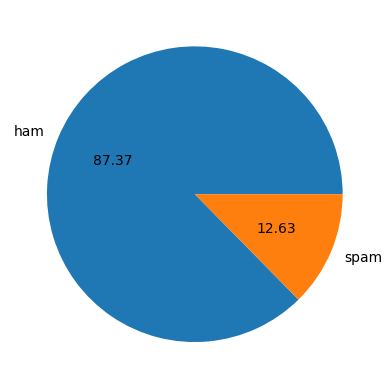

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()


In [ ]:
import nltk

In [ ]:
df['num_characters']=df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#targeting ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#targeting spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

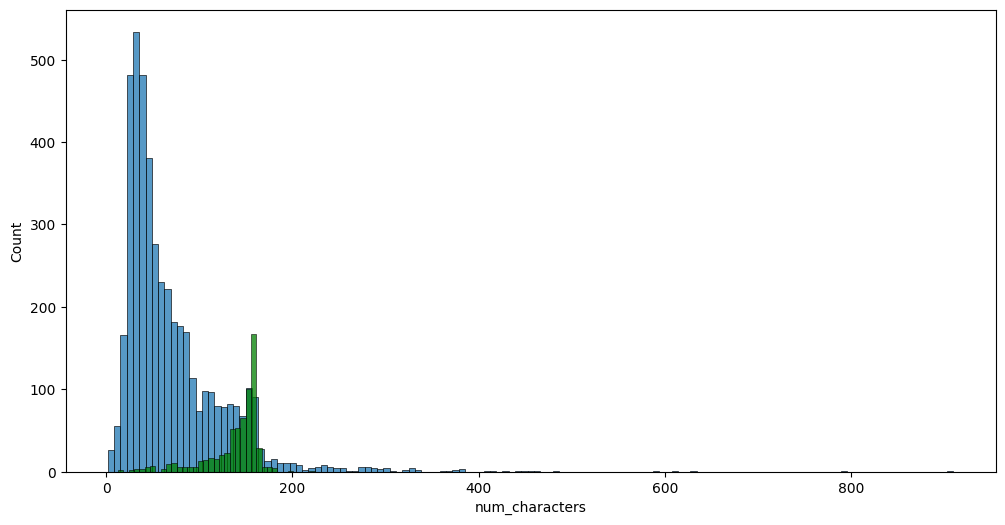

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='green')

<Axes: xlabel='num_words', ylabel='Count'>

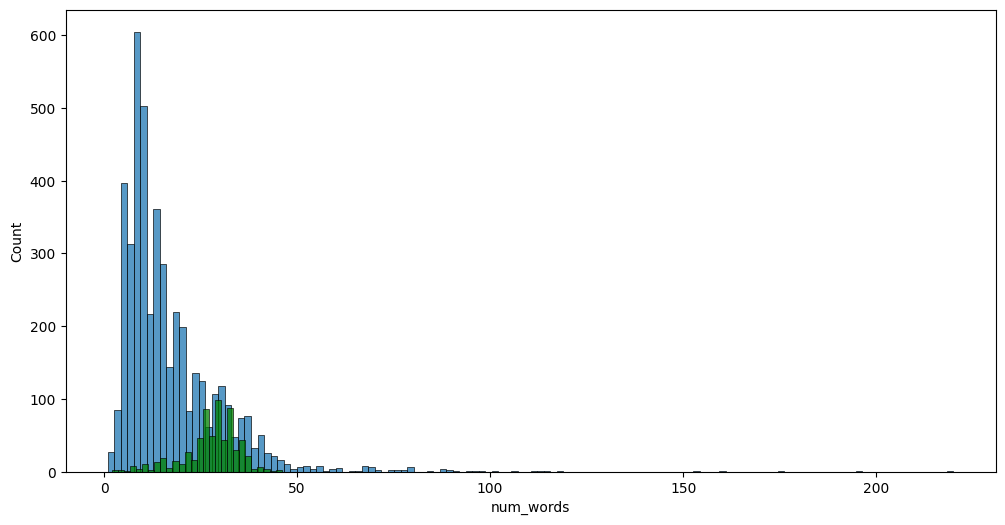

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='green')

In [ ]:
x=np.array(df["text"])
y=np.array(df["target"])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(x)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=42)


In [ ]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
if not isinstance(X_train, np.ndarray):
    X_train = X_train.toarray()
clf.fit(X_train,y_train)

GaussianNB()

In [ ]:
sample=input("Enter a messege: ")
data=cv.transform([sample]).toarray()
print(clf.predict(data))

Enter a messege: Go until jurong point, crazy.. Available only 
[0]


In [ ]:
sample=input("Enter a messege: ")
data=cv.transform([sample]).toarray()
print(clf.predict(data))

Enter a messege: Free entry in 2 a wkly comp to win FA Cup fina..
[1]


In [ ]:
X_test_dense = X_test.toarray()
clf.score(X_test_dense,y_test)


0.9078014184397163